<div style="text-align:center; font-size:40px;">
BIBLIOTECAS.
</div>

A baixo temos a importação das principais bibliotecas utilizadas para criação do painel. A biblioteca _my_plotly_package_ é essencial para criação dos elementos graficos, ela foi criada para facilitar a implementação dos elementos com poucas linhas de codigo.

Caso queira implementar algo, instale o _pip_ da sua biblioteca em seguida importe a biblioteca junto as demais para organização do codigo.

In [ ]:
from my_plotly_package.plotly_utils import criar_grafico_barras, processo_geojson_municipio, mapa_coropletico, criar_grafico_pizza_simples, card_porcentagem, card, criar_grafico_pizza_simples, processo_geojson_regiao
import dash
from dash import html, dcc, Input, Output, State, callback, Dash, register_page, dash_table
import dash_bootstrap_components as dbc

import geopandas as gpd
from unidecode import unidecode
import pandas as pd
import json
from dash.dependencies import Input, Output, State
import psycopg2

register_page(__name__, path='/framework_test')


<div style="text-align:center; font-size:40px;">
CONEXÃO.
</div>


EXEMPLO DE CONEXÃO COM BANCO DE DADOS PARA MULTIPLAS TABELAS

In [ ]:
conexao_info = {
    'database': "db_dados_tratados",
    'host': "10.111.9.167",
    'user': "user_dados_tratados",
    'password': "Tr@tADOS_PrOc355ing",
    'port': "5432"
}

def executar_consulta(query):
    with psycopg2.connect(**conexao_info) as conexao:
        with conexao.cursor() as cursor:
            cursor.execute(query)
            resultados = cursor.fetchall()
            colunas = [desc[0] for desc in cursor.description]
    return pd.DataFrame(resultados, columns=colunas)

query1 = "SELECT * FROM painel_python.tabela_bivalente_cobertura_municipios"
query2 = "SELECT * FROM painel_python.tabela_bivalente_cobertura_municipios"

exemplo1 = executar_consulta(query1)
exemplo2 = executar_consulta(query2)

<div style="text-align:center; font-size:40px;">
ESPAÇO PARA ESTILIZAÇÃO.
</div>


In [ ]:
labels={'Faixa Etaria': 'Faixa Etaria', 'Contagem Doses': 'Contagem Doses'}

cores_matriz = {
    'Masculino': '#ff9999',
    'Feminino': '#66b3ff',
}


markdown_text = '''
Exemplo para aplicar Markdown no painel.
'''

tab_card = {'height': '100%'}

config_graph={"displayModeBar": False, "showTips": False, 'scrollZoom': False, "showTips": True}


<div style="text-align:center; font-size:40px;">
SELECT BOX.
</div>


CAMPO PARA IMPLEMENTAR "SELECT BOXS" E BOTÃO DE LIMPAR FILTRO.

In [ ]:
municipio_options = [{'label': municipio, 'value': municipio} for municipio in sorted(df_municipio['Municipio'].unique())]
dropdown_municipios = dcc.Dropdown(
    id='select-municipio-bivalente2',
    options=municipio_options,    #value=municipio_options[0]['value'],  # Define um valor inicial do select box
    clearable=True,
    placeholder="Selecione um Municipio"  
)

                                                                                                  
regiao_options = [{'label': regiao, 'value': regiao} for regiao in df_municipio['Região Saude'].unique()]
dropdown_regiao = dcc.Dropdown(
    id='select-regiao2',
    options=regiao_options,    #value=municipio_options[0]['value'],  # Define um valor inicial do select box
    clearable=True,
    placeholder="Selecione uma Região"
  
)
                                                                                                    

options_sexo = [{'label': sexo, 'value': sexo} for sexo in df_municipio['Sexo'].unique()]
dropdown_sexo = dcc.Dropdown(
    id='select-sexo-municipio2',
    options=options_sexo,
    clearable=True,
    placeholder="Selecione um Sexo"
    )

limpar_filtro = dbc.Button("Limpar Filtro", id='limpar-filtro-btn2', n_clicks=0, size="sm", color="success")

<div style="text-align:center; font-size:40px;">
CALLBACKS.
</div>


CAMPO PARA ADICIONAR CALLBACKS (FILTRO POR ID DE CADA COMPONENTE)

In [ ]:
@callback(


    [Output('mapa-coropletico', 'figure'),
     Output('bar-chart', 'figure')],
    [Input('select-municipio-bivalente2', 'value')]
)

<div style="text-align:center; font-size:40px;">
FUNÇÃO PARA FILTROS.
</div>


FUNÇÃO PARA IMPLEMENTAR LOGICA DO FILTRO

In [ ]:

def update_graphs(selected_municipio):
    if selected_municipio:
        grafico_barras = grafico[grafico['Municipio']==selected_municipio]

        card_total = df_municipio[df_municipio['Municipio']==selected_municipio]['População'].sum()
    else:
        grafico_barras = grafico.groupby(['Municipio', 'Sexo']).agg({'Numero de Vacinas':'sum'}).reset_index()

        card_total = df_municipio['População'].sum()

    fig = criar_grafico_barras(
        grafico_barras.head(20), 
        'Municipio', 
        'Numero de Vacinas', 
        'Numero de Vacinas por Município', 
        500, 
        800, 
        'Sexo',
        'Numero de Vacinas',
        cores_matriz,
        labels,
        'v'
    )
    
    card_total = f"{card_total:,.0f}".replace(',', '.')
    card_populacao = card(card_total, 80,200, "População Total")
    return mapa, fig, card_populacao

<div style="text-align:center; font-size:40px;">
LAYOUT.
</div>


LINHA 1
Descrição: Esta linha serve como uma estrutura inicial com três colunas, sendo que as colunas nas extremidades (Coluna 1 e Coluna 3) estão vazias para criar espaços à esquerda e à direita da Coluna 2.

Detalhamento:
* Coluna 1 - Linha 1: Espaço vazio à esquerda.
* Coluna 2 - Linha 1: Espaço central onde futuros conteúdos podem ser adicionados.
* Coluna 3 - Linha 1: Espaço vazio à direita.


LINHA 2
Descrição: Esta linha contém vários elementos de entrada, como dropdowns e botões, para interação do usuário.

Detalhamento:
* Coluna 1 - Linha 2: Logotipo da Saúde SC, centralizado.
* Coluna 2 - Linha 2: Dropdown para selecionar um município.
* Coluna 3 - Linha 2: Dropdown para selecionar sexo.
* Coluna 4 - Linha 2: Dropdown para selecionar uma região.
* Coluna 5 - Linha 2: Botão para limpar filtros.
* Coluna 6 - Linha 2: Botão "Informações" que abre um modal com informações adicionais.


LINHA 3
Descrição: Esta linha contém vários cartões (cards) que podem ser usados para mostrar gráficos ou outras informações.

Detalhamento:
* Coluna 1 - Linha 3: Card vazio, estilo padrão.
* Coluna 2 - Linha 3: Card vazio com cor de fundo #f8f9fa.
* Coluna 3 - Linha 3: Card vazio com cor de fundo #f8f9fa.
* Coluna 4 - Linha 3: Card que contém um gráfico identificado por 'card-populacao', com configuração de gráfico 'config'.
* Coluna 5 - Linha 3: Card vazio com cor de fundo #f8f9fa.


LINHA 4
Descrição: Esta linha é usada para exibir dois gráficos lado a lado.

Detalhamento:
* Coluna 1 - Linha 4: Card contendo um gráfico coroplético (mapa), identificado por 'mapa-coropletico'.
* Coluna 2 - Linha 4: Card contendo um gráfico de barras, identificado por 'bar-chart'.


LINHA 5
Descrição: Outra linha para exibir dois gráficos lado a lado.

Detalhamento:
* Coluna 1 - Linha 5: Card contendo um gráfico de barras, identificado por 'bar-chart1'.
* Coluna 2 - Linha 5: Card contendo um gráfico de barras vazio (placeholder).


LINHA 6
Descrição: Linha para exibir um gráfico em tela cheia.

Detalhamento:
* Coluna 1 - Linha 6: Card contendo um gráfico coroplético (mapa) identificado por 'mapacoropletico2'.


LINHA 7
Descrição: Linha para adicionar uma tabela e um botão para gerar um arquivo Excel.

Detalhamento:
* Coluna 1 - Linha 7: Espaço reservado para a tabela.
Download: Componente dcc.Download para permitir o download da tabela em Excel.



Resumo do Layout:

Espaços Vazios: Algumas colunas são deixadas vazias para espaçamento.
Elementos de Interação: Dropdowns e botões são usados para permitir que os usuários filtrem e interajam com os dados.
Exibição de Dados: Vários cartões (cards) são usados para exibir gráficos e informações importantes.
Design Responsivo: O layout usa classes Bootstrap para garantir que os elementos se ajustem bem em diferentes tamanhos de tela (sm, md, lg, xl).
Este layout é configurado para ser responsivo e intuitivo, proporcionando uma interface amigável para visualização e interação com os dados.

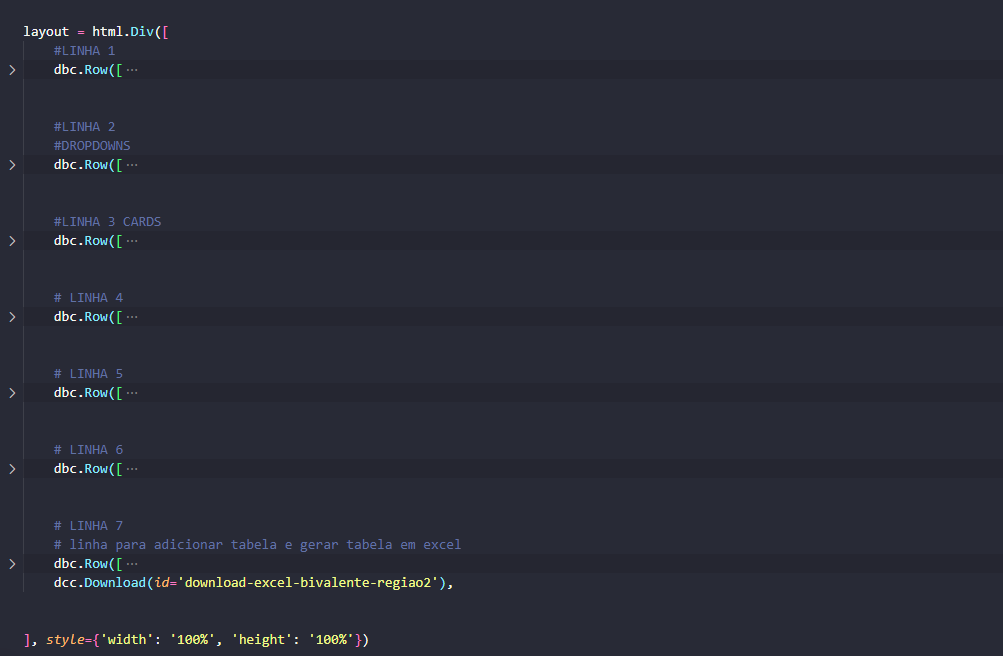

In [ ]:

layout = html.Div([
    #LINHA 1
    dbc.Row([
        #COLUNA 1 - LINHA 1
        dbc.Col(width=4),  # Espaço extra à esquerda, se necessário

        #COLUNA 2 - LINHA 1
        dbc.Col([
        ], width=4),

        #COLUNA 3 - LINHA 1
        dbc.Col(width=4),  # Espaço extra à esquerda, se necessário
    ], style={'width': '100%'}, className='mt-2'),  # Removido cálculo da altura


    #LINHA 2
    #DROPDOWNS
    dbc.Row([
        dbc.Col([
            dbc.Col([
                html.Img(
                    src="https://www.saude.sc.gov.br/images/stories/website/2023_marca_ses.png",
                    alt="Logotipo da Saúde SC",
                    style={'width': '70%', 'height': '70%', 'margin-top': '10px'}
                )
            ], style={'text-align': 'center'}),  # Add text-align: center
        ], sm=2, lg=2),

        dbc.Col(
            dbc.Card(
                dbc.CardBody([
                    dcc.Dropdown(
                        id='select-municipio-bivalente2',
                        options=municipio_options,
                        clearable=True,
                        placeholder="Selecione um Município"
                    ),
                ]),
                style={'border': 0}
            ),
            sm=9,
            lg=2
        ),

        dbc.Col(
            dbc.Card(
                dbc.CardBody([
                    html.Div([
                        dropdown_sexo
                    ]),
                ]),
                style={'border': 0}
            ),
            sm=9,
            lg=2
        ),

        dbc.Col(
            dbc.Card(
                dbc.CardBody([
                    html.Div([
                        dropdown_regiao
                    ]),
                ]),
                style={'border': 0}
            ),
            sm=9,
            lg=2
        ),

        dbc.Col(
            dbc.Card(
                dbc.CardBody([
                    html.Div([
                        limpar_filtro
                    ])
                ]),
                style={'border': 0}
            ),
            sm=9,
            lg=2
        ),

        dbc.Col(
            dbc.Card(
                dbc.CardBody([
                    dbc.Button("Informações", id="open2", color='success'),
                
                    # Modal que contém as informações em Markdown
                    dbc.Modal(
                        [
                            dbc.ModalHeader("Informações Adicionais"),
                            dbc.ModalBody(dcc.Markdown(children=markdown_text)),
                            dbc.ModalFooter(
                                dbc.Button("Fechar", id="close2", className="ml-auto")
                            ),
                        ],
                        id="modal2",
                        size="lg"  # Define o tamanho do modal (sm, md, lg, xl)
                        #centered=True  # Centraliza o modal na tela
                    ),
                ]),
                style={'border': 0}
            ),
            sm=9,
            lg=2
        ),


    ], style={'margin-bottom': '0px', 'background-color': 'white'}, className='sticky-top'),


    #LINHA 3 CARDS
    dbc.Row([
        #COLUNA 1 - LINHA 3
        dbc.Col([
            dbc.Card(
                dbc.CardBody([
                ]),
                style={'border': 0}
            )
        ],sm=2, lg=2),

        #COLUNA 2 - LINHA 3
        dbc.Col(
            dbc.Card(
                dbc.CardBody([
                ]),
                style={'backgroundColor': '#f8f9fa'}
            ),
            xs=12, sm=6, md=4, lg=2, xl=2,
            className="mb-4"  # Adiciona um espaçamento na parte inferior quando os cards empilham
        ),

        #COLUNA 3 - LINHA 3
        dbc.Col(
            dbc.Card(
                dbc.CardBody(
                ),
                style={'backgroundColor': '#f8f9fa'}
            ),
            xs=12, sm=6, md=4, lg=2, xl=2,
            className="mb-4"  # Adiciona um espaçamento na parte inferior quando os cards empilham
        ),

        #COLUNA 4 - LINHA 3
        dbc.Col(
            dbc.Card(
                dbc.CardBody(
                        dcc.Graph(id='card-populacao',config=config_graph),
                ),
                style={'backgroundColor': '#f8f9fa'}
            ),
            xs=12, sm=6, md=4, lg=2, xl=2,
            className="mb-4"  # Adiciona um espaçamento na parte inferior quando os cards empilham
        ),
        #COLUNA 5 - LINHA 3
        dbc.Col(
            dbc.Card(
                dbc.CardBody(
                        #cc.Graph(id='card2-test', config=config_graph),
                ),
                style={'backgroundColor': '#f8f9fa'}  # Defina a cor de fundo do card inteiro
            ),
            xs=12, sm=6, md=4, lg=2, xl=2,
            className="mb-4"  # Adiciona um espaçamento na parte inferior quando os cards empilham
        ),
    ], style={'margin-bottom': '0px'}),  # Remover a altura fixa


    # LINHA 4
    dbc.Row([
        #COLUNA 1 - LINHA 4
        dbc.Col([
            dbc.Card([
                        dcc.Graph(id='mapa-coropletico',config=config_graph),
            ], style={'border': 0})
        ], sm=6, md=6, lg=6),

        #COLUNA 2 - LINHA 4
        dbc.Col([
            dbc.Card([
                        dcc.Graph(id='bar-chart',config=config_graph),
            ], style={'border': 0})
        ], sm=6, md=6, lg=6)

    ], style={'width': '100%', 'margin-bottom': '0px'}),


    # LINHA 5
    dbc.Row([
        #COLUNA 1 - LINHA 5
        dbc.Col([
            dbc.Card([
                dbc.CardBody([
                        dcc.Graph(id='bar-chart1', config=config_graph),
                ], style={'padding': '10px'})  # Adjust padding as needed
            ],style={'border': 0})
        ], sm=6, md=6, lg=6),

        #COLUNA 2 - LINHA 5
        dbc.Col([
            dbc.Card([
                dbc.CardBody([
                        dcc.Graph(config=config_graph),
                ], style={'padding': '10px'})  # Adjust padding as needed
            ],style={'border': 0})
        ], sm=6, md=6, lg=6)

    ], style={'width': '100%', 'margin-bottom': '0px'}),


    # LINHA 6
    dbc.Row([
        #COLUNA 1 - LINHA 6
        dbc.Col([
            dbc.Card([
                     dbc.CardBody([
                        dcc.Graph(id='mapacoropletico2',config=config_graph),
                        ], style={'border':0, 'overflow-x':'auto', 'weidth':'90%'})
            ],style={'border':0})
        ], sm=12, md=12, lg=12),
    ], style={'width': '100%', 'margin-bottom': '0px'}),


    # LINHA 7
    # linha para adicionar tabela e gerar tabela em excel
    dbc.Row([
        #COLUNA 1 - LINHA 7
        dbc.Col([

        ], sm=12, md=12, lg=12),
    ], style={'width': '100%', 'height': '100%'}),
    dcc.Download(id='download-excel-bivalente-regiao2'),


], style={'width': '100%', 'height': '100%'})
